In [1]:
import numpy as np
import pandas as pd
#import xgboost
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.interactive(True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import preprocessing


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
%matplotlib inline

In [3]:
from combine_two_parts import X_training, X_validation, X_test, y_training, y_validation, y_test

/home/ramya/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/media/ramya/D/Data_Science_Retreat/Jose_Minicompetition/DSR_minicompetition/clean_team_data.py:114: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop("Person.ID", axis=1, inplace=True)


Number of columns in grant data is  1718
Number of columns in team data is  171
Number of columns in the complete & cleaned data sets  is  1888


Number of rows in y_training  6633
Number of rows in y_validation 1557
Number of rows in y_test 518


Number of rows in X_training  6633
Number of rows in X_validation 1557
Number of rows in X_test 518


## Random Classifier Model

In [15]:
estimat = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 220, 240, 260, 280, 300, 400]
num_estimators, es_oob_score, es_testing_score = [], [], []
for dep in estimat:
    model = RandomForestClassifier(n_estimators = dep, max_depth = 15, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_training, y_training)
    oob_score = model.oob_score_
    test_score = model.score(X_validation, y_validation)
    print("N_estimators is :", dep)
    print("Train score : ", oob_score)
    print("Test Score : ", test_score)
    num_estimators.append(dep)
    es_oob_score.append(oob_score)
    es_testing_score.append(test_score)

/home/ramya/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ramya/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


N_estimators is : 10
Train score :  0.792250866878
Test Score :  0.751445086705


/home/ramya/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ramya/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


N_estimators is : 20
Train score :  0.827076737524
Test Score :  0.763648041105
N_estimators is : 30
Train score :  0.836122418212
Test Score :  0.763648041105
N_estimators is : 40
Train score :  0.833107191316
Test Score :  0.76814386641
N_estimators is : 50
Train score :  0.839137645108
Test Score :  0.7591522158
N_estimators is : 60
Train score :  0.837780793005
Test Score :  0.758509955042
N_estimators is : 70
Train score :  0.840946781245
Test Score :  0.750160565189
N_estimators is : 80
Train score :  0.842605156038
Test Score :  0.754656390495
N_estimators is : 90
Train score :  0.845318860244
Test Score :  0.754656390495
N_estimators is : 100
Train score :  0.846675712347
Test Score :  0.767501605652
N_estimators is : 110
Train score :  0.84863560983
Test Score :  0.763648041105
N_estimators is : 120
Train score :  0.848786371174
Test Score :  0.768786127168
N_estimators is : 130
Train score :  0.846826473692
Test Score :  0.766859344894
N_estimators is : 140
Train score :  0.8

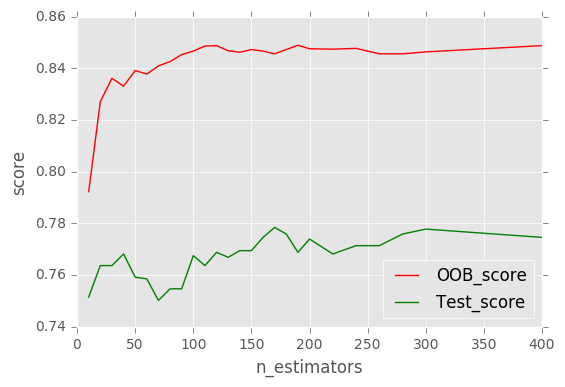

In [16]:
# 260 is best for n_estimators
fig1 = plt.figure(1)
plt.plot(estimat, es_oob_score, 'r-', label = "OOB_score")
plt.plot(estimat, es_testing_score, 'g-', label = "Test_score")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend(loc = 4)
plt.show()
fig1.savefig("n_estimators.png")

In [17]:
depth = [6, 7, 8, 9,  10,11,  12, 13,  14, 15,  16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 50, 60, 70, 80, 90, 100]
max_depth, depth_oob_score, depth_testing_score = [], [], []
for dep in depth:
    model = RandomForestClassifier(n_estimators = 260, max_depth = dep, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_training, y_training)
    oob_score = model.oob_score_
    test_score = model.score(X_validation, y_validation)
    print("Depth is :", dep)
    print("OOB score : ", oob_score)
    print("Test Score : ", test_score)
    max_depth.append(dep)
    depth_oob_score.append(oob_score)
    depth_testing_score.append(test_score)

Depth is : 6
OOB score :  0.820292477009
Test Score :  0.777777777778
Depth is : 7
OOB score :  0.821046283733
Test Score :  0.775850995504
Depth is : 8
OOB score :  0.824815317353
Test Score :  0.774566473988
Depth is : 9
OOB score :  0.829187396352
Test Score :  0.760436737315
Depth is : 10
OOB score :  0.834916327454
Test Score :  0.779062299294
Depth is : 11
OOB score :  0.838082315694
Test Score :  0.781631342325
Depth is : 12
OOB score :  0.842454394693
Test Score :  0.774566473988
Depth is : 13
OOB score :  0.841248303935
Test Score :  0.768786127168
Depth is : 14
OOB score :  0.849992461933
Test Score :  0.76814386641
Depth is : 15
OOB score :  0.845620382934
Test Score :  0.771355170199
Depth is : 16
OOB score :  0.851500075381
Test Score :  0.767501605652
Depth is : 18
OOB score :  0.853459972863
Test Score :  0.790622992935
Depth is : 20
OOB score :  0.858435097241
Test Score :  0.774566473988
Depth is : 22
OOB score :  0.857229006483
Test Score :  0.777777777778
Depth is : 

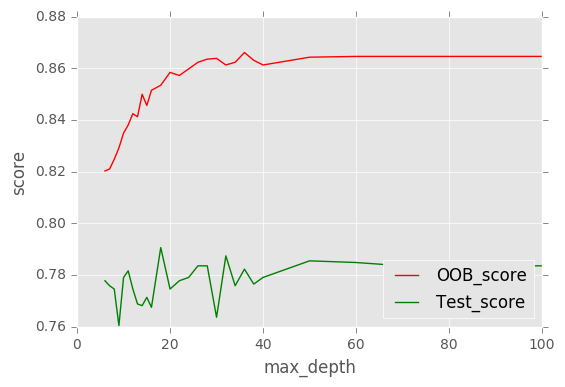

In [18]:
# 50 is best for depth

fig1 = plt.figure(1)
plt.plot(depth, depth_oob_score, 'r-', label = "OOB_score")
plt.plot(depth, depth_testing_score, 'g-', label = "Test_score")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend(loc = 4)
plt.show()
fig1.savefig("max_depth.png")

In [ ]:
x_axis = list(range(4, 40, 2))


In [ ]:
depth = [6, 7, 8, 9,  10,11,  12, 13,  14, 15,  16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 50, 60, 70, 80, 90, 100]
max_depth, depth_oob_score, depth_testing_score = [], [], []
for dep in depth:
    model = RandomForestClassifier(n_estimators = 60, max_depth = dep, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_training, y_training)
    oob_score = model.oob_score_
    test_score = model.score(X_validation, y_validation)
    print("Depth is :", dep)
    print("OOB score : ", oob_score)
    print("Test Score : ", test_score)
    max_depth.append(dep)
    depth_oob_score.append(oob_score)
    depth_testing_score.append(test_score)

In [19]:
model = RandomForestClassifier(n_estimators = 300, max_depth = 50, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
model.fit(X_training, y_training)
feature_names = X_training.columns
importances = model.feature_importances_
important_names = feature_names[importances > np.mean(importances)]
print(len(important_names), len(feature_names))
my_dict = dict(zip(feature_names, importances))
sorted(my_dict.items(), key = lambda x: x[1], reverse= True)

196 1887


[('Number.of.Unsuccessful.Grant_max', 0.10063308250329615),
 ('Number.of.Unsuccessful.Grant_mean', 0.085137531200324232),
 ('Number.of.Unsuccessful.Grant_min', 0.047013618171239883),
 ('Number.of.Successful.Grant_mean', 0.044562693826232264),
 ('Contract.Value.Band...see.note.A', 0.03970766664749454),
 ('Number.of.Successful.Grant_max', 0.039262263692728186),
 ('Number.of.Successful.Grant_min', 0.025969859738689337),
 ('day_1', 0.014814343801367485),
 ('S_4D', 0.013058194881392284),
 ('month_1', 0.012595469379180367),
 ('Faculty.No._25', 0.010984544953311763),
 ('A._mean', 0.01075234001989875),
 ('A_mean', 0.010477518426873483),
 ('G_30B', 0.010461378689899083),
 ('A._max', 0.010322741996598109),
 ('B_mean', 0.010257782562971551),
 ('B_max', 0.0099852113841974663),
 ('season_0', 0.0097680316436029903),
 ('A_max', 0.0097131498683962255),
 ('day_24', 0.0092195977934952274),
 ('Year.of.Birth_mean', 0.0088356369214734661),
 ('B_min', 0.0082828790017928453),
 ('WeekofYear_1', 0.008276274862

In [20]:
np.mean(importances)

0.00052994170641229457

In [21]:
important_names_mean = feature_names[importances > np.mean(importances)]
len(important_names)

196

In [22]:
np.percentile(importances, 75)

9.2147980332188092e-05

In [23]:
important_names_75 = feature_names[importances > np.percentile(importances, 75)]
len(important_names)

196

In [24]:
important_names = feature_names[importances > np.percentile(importances, 50)]
len(important_names)

943

In [25]:
X_validation[important_names]

,Contract.Value.Band...see.note.A,S_100D,S_101A,S_103C,S_105A,S_113A,S_120D,S_126B,S_12D,S_130B,...,A._mean,A_min,A_max,A_mean,B_min,B_max,B_mean,C_min,C_max,C_mean
Grant.Application.ID,,,,,,,,,,,,,,,,,,,,,
6634,0,0,0,0,0,0,0,0,0,0,...,9.666667,0.0,44.0,17.333333,0.0,16.0,8.000000,0.0,9.0,3.000000
6635,0,0,0,0,0,0,0,0,0,0,...,5.000000,10.0,10.0,10.000000,16.0,16.0,16.000000,1.0,1.0,1.000000
6636,1,0,0,0,0,0,0,0,0,0,...,0.000000,1.0,1.0,1.000000,2.0,2.0,2.000000,0.0,0.0,0.000000
6637,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
6638,0,0,0,0,0,0,0,0,0,0,...,0.666667,0.0,2.0,0.666667,0.0,0.0,0.000000,0.0,0.0,0.000000
6639,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,3.0,1.500000,0.0,2.0,1.000000,0.0,1.0,0.500000
6640,2,0,0,0,0,0,0,0,0,0,...,1.000000,3.0,3.0,3.000000,2.0,2.0,2.000000,1.0,1.0,1.000000
6642,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
6643,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


## Check with different features

In [ ]:
names = [
        #"Neural Net", 
        #"Logistic Regression", 
        #"Nearest Neighbors", 
        #"Linear SVM", 
        #"RBF SVM", 
        #"Gaussian Process",
        "Decision Tree", 
        "Random Forest", 
        #"AdaBoost",
        "Gradient Boosting Classifier"
        #"Naive Bayes", 
        #"QDA"
        ]

classifiers = [
        #MLPClassifier(alpha=0.0001),
        #LogisticRegression(C=1e-10, penalty='l2', tol=1e-6),
        #KNeighborsClassifier(3),
        #SVC(kernel="linear", C=0.025),
        #SVC(gamma=2, C=1),
        #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(n_estimators = 260, max_depth = 80, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1
                             ),
        #AdaBoostClassifier(n_estimators = 150, algorithm = "SAMME"),
        GradientBoostingClassifier(n_estimators= 260, max_depth = 80)
        #GaussianNB(),
        #QuadraticDiscriminantAnalysis()
        ]

cms = {}
n_neg = float(y_test.value_counts()[0])
n_pos = float(y_test.value_counts()[1])
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_training, y_training)
    #cm = confusion_matrix(y_test, clf.predict(X_test))
    #cms[name] = cm
    #print("True positives: {}".format(cm[1,1] / n_pos))
    #print("False negatives: {}".format(cm[1,0] / n_pos))
    #print("True negatives: {}".format(cm[0,0] / n_neg))
    #print("True positives: {}".format(cm[0,1] / n_neg))
    #print("")
    fpr, tpr, _ = roc_curve(y_validation, clf.predict_proba(X_validation)[:,1])
    
    roc_auc = auc(fpr, tpr)
    print("ROC AUC: %0.2f" % roc_auc)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators = 30, max_depth=30, oob_score = True, random_state = 1)
model.fit(X_training, y_training)
feature_names = X_training.columns
importances = model.feature_importances_
df_imp = pd.DataFrame(index=feature_names)
df_imp["importance"] = importances
df_imp.sort_values("importance", ascending=False, inplace=True)
df_imp.head(100)

In [26]:
X_full = X_training.append(X_validation)
y_full = y_training.append(y_validation)
    

Decision Tree
ROC AUC: 0.84


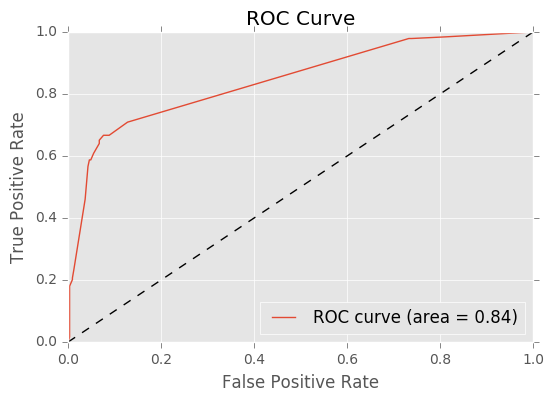

Random Forest
ROC AUC: 0.93


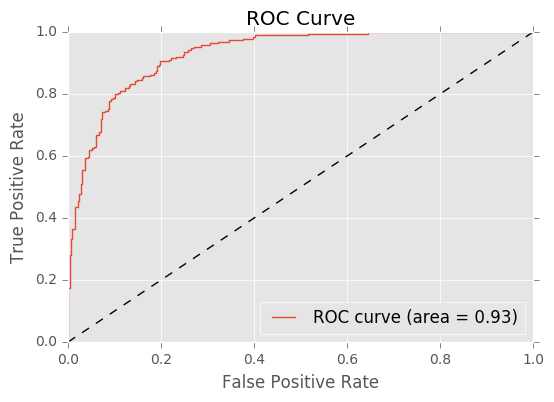

Gradient Boosting Classifier
ROC AUC: 0.95


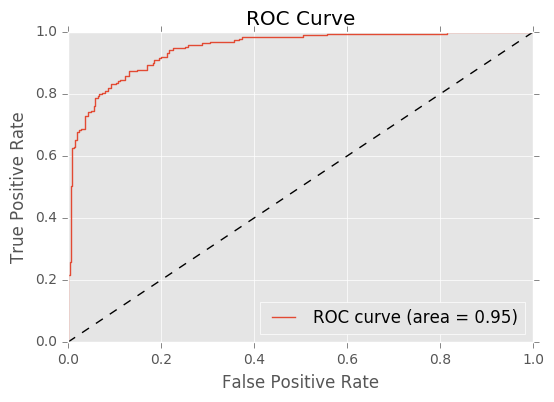

In [28]:
names = [
        #"Neural Net", 
        #"Logistic Regression", 
        #"Nearest Neighbors", 
        #"Linear SVM", 
        #"RBF SVM", 
        #"Gaussian Process",
        "Decision Tree", 
        "Random Forest", 
        #"AdaBoost",
        "Gradient Boosting Classifier"
        #"Naive Bayes", 
        #"QDA"
        ]

classifiers = [
        #MLPClassifier(alpha=0.0001),
        #LogisticRegression(C=1e-10, penalty='l2', tol=1e-6),
        #KNeighborsClassifier(3),
        #SVC(kernel="linear", C=0.025),
        #SVC(gamma=2, C=1),
        #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(n_estimators = 300, max_depth = 50, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1
                             ),
        #AdaBoostClassifier(n_estimators = 150, algorithm = "SAMME"),
        GradientBoostingClassifier(n_estimators= 500, max_depth = 50)
        #GaussianNB(),
        #QuadraticDiscriminantAnalysis()
        ]

cms = {}
n_neg = float(y_test.value_counts()[0])
n_pos = float(y_test.value_counts()[1])
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_full, y_full)
    #cm = confusion_matrix(y_test, clf.predict(X_test))
    #cms[name] = cm
    #print("True positives: {}".format(cm[1,1] / n_pos))
    #print("False negatives: {}".format(cm[1,0] / n_pos))
    #print("True negatives: {}".format(cm[0,0] / n_neg))
    #print("True positives: {}".format(cm[0,1] / n_neg))
    #print("")
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    
    roc_auc = auc(fpr, tpr)
    print("ROC AUC: %0.2f" % roc_auc)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [31]:
model = RandomForestClassifier(n_estimators = 300, max_depth = 50, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
model.fit(X_training, y_training)
feature_names = X_training.columns
importances = model.feature_importances_
important_names = feature_names[importances > np.mean(importances)]
print(len(important_names), len(feature_names))
my_dict = dict(zip(feature_names, importances))
D = sorted(my_dict.items(), key = lambda x: x[1], reverse= True)

E = D[:10]
plt.figure()
plt.bar(range(len(E)), E.values(), align='center')
plt.xticks(range(len(E)), E.keys())
plt.show()
plt.savefig("feature_importances.png")

196 1887


AttributeError: 'list' object has no attribute 'values'

In [30]:
D

[('Number.of.Unsuccessful.Grant_max', 0.10063308250329615),
 ('Number.of.Unsuccessful.Grant_mean', 0.085137531200324232),
 ('Number.of.Unsuccessful.Grant_min', 0.047013618171239883),
 ('Number.of.Successful.Grant_mean', 0.044562693826232264),
 ('Contract.Value.Band...see.note.A', 0.03970766664749454),
 ('Number.of.Successful.Grant_max', 0.039262263692728186),
 ('Number.of.Successful.Grant_min', 0.025969859738689337),
 ('day_1', 0.014814343801367485),
 ('S_4D', 0.013058194881392284),
 ('month_1', 0.012595469379180367),
 ('Faculty.No._25', 0.010984544953311763),
 ('A._mean', 0.01075234001989875),
 ('A_mean', 0.010477518426873483),
 ('G_30B', 0.010461378689899083),
 ('A._max', 0.010322741996598109),
 ('B_mean', 0.010257782562971551),
 ('B_max', 0.0099852113841974663),
 ('season_0', 0.0097680316436029903),
 ('A_max', 0.0097131498683962255),
 ('day_24', 0.0092195977934952274),
 ('Year.of.Birth_mean', 0.0088356369214734661),
 ('B_min', 0.0082828790017928453),
 ('WeekofYear_1', 0.008276274862

ValueError: incompatible sizes: argument 'left' must be length 1 or scalar

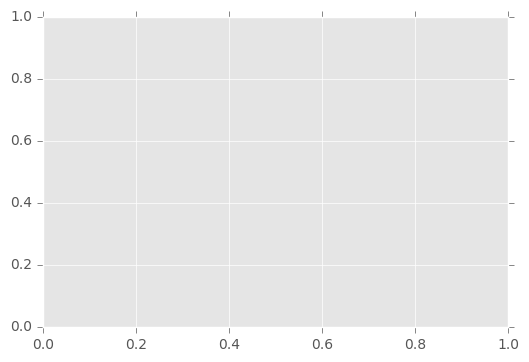

In [34]:
fig, ax = plt.subplots()
ax.bar(range(len(E)), [t[1] for t in E]  , align="center", orientation = 'horizontal')
ax.set_xticks(range(len(E)))
ax.set_xticklabels([t[0] for t in E])

plt.show()